# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Tainara Soares Mendes </font> 


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [115]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [145]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [146]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [147]:
import numpy as np

df['Hemisfério'] = np.where(df['Latitude']>0, 'Norte', 'Sul')

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

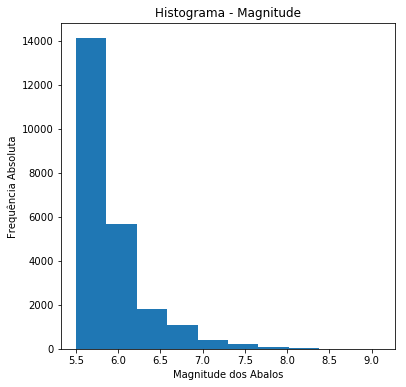

In [148]:
mag_hist = df.Magnitude.plot.hist(title='Histograma - Magnitude', figsize=(6,6))
plt.ylabel('Frequência Absoluta')
plt.xlabel('Magnitude dos Abalos')

É possível extrair, a partir do histograma, que os abalos de menor magnitude (entre 5 e 6 graus) ocorrem com maior frequência que os de maior magnitude (acima de 6 graus).

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [156]:
loc, scale = expon.fit(df.Magnitude)

loc,scale

(5.4999999996710809, 0.38254864885090978)

O 'loc' configura onde o gráfico inicia, em relação ao eixo x. Quanto ao 'scale', não sei qual é a sua função.

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

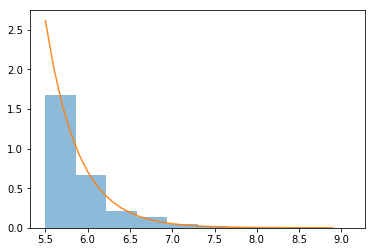

In [150]:
x = np.arange(5.5, 9, 0.1)

plt.hist(df.Magnitude, normed=1, histtype='stepfilled', alpha=0.5)
plt.plot(x, expon.pdf(x, loc, scale), alpha=0.9)

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [152]:
ct1=pd.crosstab(df.Hemisfério,df.Type,margins=True,rownames=['Tipo'], colnames=['Hemisfério'],normalize='all')

ct1

Hemisfério,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Tipo,,,,,
Norte,0.447121,0.000085,0.006279,0.000000,0.453485
Sul,0.545191,0.000085,0.001196,0.000043,0.546515
All,0.992312,0.000171,0.007475,0.000043,1.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [123]:
prob_terremoto_norte = 0.447121/0.992312

print('A probabilidade de ocorrer um terremoto no hemisfério norte é de {0}'.format(prob_terremoto_norte))

A probabilidade de ocorrer um terremoto no hemisfério norte é de 0.45058509823523246


Explique o seu raciocínio

Encarei a probabilidade requerida como uma probabilidade condicional. Dado que ocorreu um terremoto, qual é a chance de esta ocorrência ter se dado no Norte? Para tal, utilizando-me da Crosstab, extraí o dado relativo à probabilidade de ocorrência de um terremoto no Hemifério Norte - o qual é gerado em comparação a todas as demais possíveis causas de tremores de terra neste Hemifério - e dividi esse número pela probabilidade de ocorrência de um terremoto - em qualquer dos hemisférios (se a ocorrência de um terremoto é o ponto de partida para o cálculo da minha probabilidade, tenho de normalizar as minhas contas utilizando-me desta probabilidade em questão).

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [155]:
ct2=pd.crosstab(df.Hemisfério,df.Type,margins=True,rownames=['Tipo'], colnames=['Hemisfério'],normalize='columns')
ct2

Hemisfério,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Tipo,,,,,
Norte,0.450585,0.5,0.84,0.0,0.453485
Sul,0.549415,0.5,0.16,1.0,0.546515


In [124]:
prob_nuclear_explosion = (0.84*0.007475)/0.453485
print('A probabilidade de uma ocorrência no Norte ter sido do tipo "Nuclear Explosion" é de {0}'.format(prob_nuclear_explosion))

A probabilidade de uma ocorrência no Norte ter sido do tipo "Nuclear Explosion" é de 0.013846102958201482


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

Calculei a resposta no item anterior por meio do Teorema de Bayes e confirmei a resposta na primeira Crosstab, encontrando a probabilidade da ocorrência de uma explosão nuclear dentre as probabilidades das demais eventuais causas de ocorrência de tremores de terra no Hemisfério Norte.

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

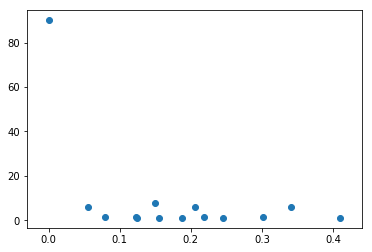

In [128]:
plt.scatter(df['Magnitude Error'],df['Depth'])

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [129]:
df.corr()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
Latitude,1.000000,-0.893475,-0.849861,0.092804,-0.640996,0.047302,0.375621,-0.449282,-0.496831,-0.179381,0.047453,-0.145887
Longitude,-0.893475,1.000000,0.989156,-0.463369,0.733240,0.203238,-0.450969,0.374292,0.133298,-0.273142,-0.371899,-0.125503
Depth,-0.849861,0.989156,1.000000,-0.543800,0.703093,0.204745,-0.481299,0.349410,0.066177,-0.358769,-0.485036,-0.143403
Depth Error,0.092804,-0.463369,-0.543800,1.000000,-0.474761,-0.621015,0.522184,0.357133,0.771072,0.842604,0.844146,0.390838
Depth Seismic Stations,-0.640996,0.733240,0.703093,-0.474761,1.000000,0.278579,-0.419536,-0.024712,-0.183627,-0.144880,-0.081382,0.170400
Magnitude,0.047302,0.203238,0.204745,-0.621015,0.278579,1.000000,-0.369843,-0.316102,-0.588942,-0.517275,-0.443434,-0.438841
Magnitude Error,0.375621,-0.450969,-0.481299,0.522184,-0.419536,-0.369843,1.000000,0.424626,0.192393,0.211660,0.452765,0.238118
Magnitude Seismic Stations,-0.449282,0.374292,0.349410,0.357133,-0.024712,-0.316102,0.424626,1.000000,0.640909,0.151940,0.136931,0.093769
Azimuthal Gap,-0.496831,0.133298,0.066177,0.771072,-0.183627,-0.588942,0.192393,0.640909,1.000000,0.747377,0.519585,0.334303
Horizontal Distance,-0.179381,-0.273142,-0.358769,0.842604,-0.144880,-0.517275,0.211660,0.151940,0.747377,1.000000,0.817890,0.610043


In [130]:
print("A correlação entre as variáveis 'Magnitude Error' e 'Depth' é de -0.481299")

A correlação entre as variáveis 'Magnitude Error' e 'Depth' é de -0.481299


Explique o que significa o valor da correlação calculada acima? 

O coeficiente de correlação obtido acima indica o quão associada a variável Magnitude Error está à variável Depth. Esse valor varia entre 1 e -1, sendo que quanto mais próximo estiver desses dois extremos, maior é o grau de associação entre as variáveis, e quanto mais próximo de 0, menos associadas e dependentes uma da outra elas estão. Observando o gráfico, quanto mais dispersos estiverem os pontos, menor é a correlação entre as duas variáveis analisadas, bem como quanto mais unidos, maior é esta associação. 

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

Latitude
count    14.000000
mean     36.381374
std       6.223248
min      18.045000
25%      37.253458
50%      37.295917
75%      37.311167
max      46.207333
Name: Latitude, dtype: float64

Longitude
count     14.000000
mean    -113.313869
std       13.061325
min     -122.188000
25%     -116.470417
50%     -116.409917
75%     -116.336375
max      -68.350900
Name: Longitude, dtype: float64



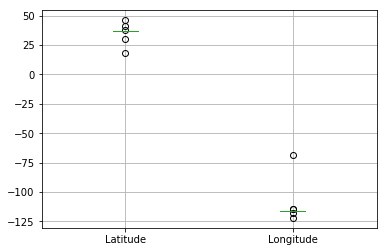

In [142]:
print("Latitude\n{0}\n" .format(df.Latitude.describe()))

print("Longitude\n{0}\n" .format(df.Longitude.describe()))


df.boxplot(['Latitude','Longitude'])

O 'describe' retorna a média, o desvio padrão dos dados em relação à média, o mínimo e o máximo valor assumido pela variável e os valores dos quartis (25%, 50% e 75% da amostra).

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


Não encontrei nenhum Magnitude Type do tipo MB, apenas ML e um MD, mas, independente do que se esteja querendo dizer, se partimos do pressuposto de que as variáveis Magnitude Type e Type são independentes, basta multiplicar as probabilidades - dentro do Hemifério Sul e do Hemisfério Norte - da ocorrência de uma explosão nuclear (Nuclear Explosion) pela probabilidade de ocorrência do tipo de magnitude esperado. O hemisfério com a maior probabilidade é aquele onde há mais chance de ocorrer os tipos de abalo esperados.